In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [2]:
merged_df = pd.merge(city_df, ride_df, how='outer', on='city')
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
# Urban DF
urban_df = merged_df.loc[(merged_df['type'] == 'Urban'), :]

# Urban Grouped by Cities
urban_cities = urban_df.groupby('city')

# Urban Cities Unique List
urban_cities_unique = urban_df['city'].unique()

# Urban City Driver Count
urban_city_driverCount = urban_cities['driver_count'].first()

# Urban City Size
urban_size = [(n * 10) for n in urban_city_driverCount]

# Urban X and Y
urban_avgFare = []
urban_numRides = []

for city in urban_cities_unique:
    urban_city_avgFare = urban_df.loc[urban_df['city'] == city, 'fare'].mean()
    urban_city_numRides = urban_df.loc[urban_df['city'] == city, 'ride_id'].count()
    urban_avgFare.append(round(urban_city_avgFare, 2))
    urban_numRides.append(urban_city_numRides)

In [4]:
# Suburban DF
suburban_df = merged_df.loc[merged_df['type'] == 'Suburban', :]

# Suburban Grouped by Cities
suburban_cities = suburban_df.groupby('city')

# Suburban Cities Unique List
suburban_cities_unique = suburban_df['city'].unique()

# Suburban City Driver Count
suburban_city_driverCount = suburban_cities['driver_count'].first()

# Suburban City Size
suburban_size = [(n * 10) for n in suburban_city_driverCount]

# Suburban X and Y
suburban_avgFare = []
suburban_numRides = []

for city in suburban_cities_unique:
    suburban_city_avgFare = suburban_cities['fare'].mean()
    suburban_city_numRides = suburban_cities['ride_id'].count()
    suburban_avgFare.append(round(suburban_city_avgFare, 2))
    suburban_numRides.append(suburban_city_numRides)

In [5]:
# Rural DF
rural_df = merged_df.loc[merged_df['type'] == 'Rural', :]

# Rural Grouped by Cities
rural_cities = rural_df.groupby('city')

# Rural Cities Unique List
rural_cities_unique = [rural_df['city'].unique()]

# Rural City Driver Count
rural_city_numDriver = rural_cities['driver_count'].first()

# Rural City Size
rural_size = [(n * 20) for n in rural_city_numDriver]

# Rural X and Y
rural_avgFare = []
rural_numRides = []

for city in rural_cities_unique:
    rural_city_avgFare = rural_cities['fare'].mean()
    rural_city_numRides = rural_cities['ride_id'].count()
    rural_avgFare.append(round(rural_city_avgFare, 2))
    rural_numRides.append(rural_city_numRides)

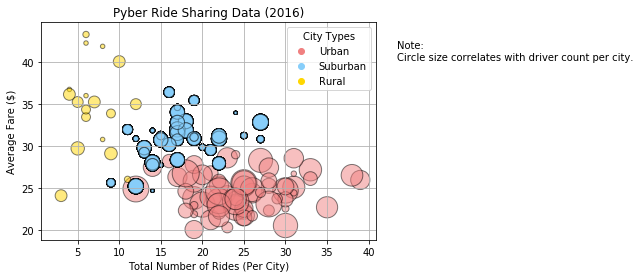

In [6]:
# Urban Plot
urban_plot = plt.scatter(urban_numRides, urban_avgFare, color='lightcoral', edgecolor='black', 
                         s=urban_size, alpha=0.5, label='Urban')

# Suburban Plot
suburban_plot = plt. scatter(suburban_numRides, suburban_avgFare, color='lightskyblue', edgecolor='black', 
                             s=suburban_size, label='Suburban', alpha=0.5)

# Rural Plot
rural_plot = plt.scatter(rural_numRides, rural_avgFare, color='gold', edgecolor='black', 
                        s=rural_size, label="Rural", alpha=0.5)

# Formatting
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.figtext(.95, .75, 'Note: \nCircle size correlates with driver count per city.')
plt.grid()
legendColors = {'Urban': 'lightcoral', 'Suburban': 'lightskyblue', 'Rural': 'gold'}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legendColors.values()]
plt.legend(markers, legendColors.keys(), numpoints=1, title='City Types', loc='best')
plt.savefig("Images/01_ride_share_bubblePlot.png")
plt.show()

## Total Fares by City Type

In [7]:
# Groupby City Type
types_df = merged_df.groupby('type')
types_df.count()

# Total Fares
fare_type_totals = types_df['fare'].sum()
fare_total = fare_type_totals.sum()
fare_total

# Total Fare Percents by City Type
type_percents = round((fare_type_totals / fare_total) * 100, 2)
type_percents = type_percents.tolist()

[6.81, 30.46, 62.72]

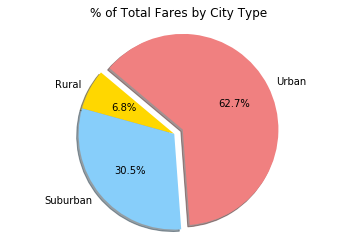

In [8]:
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)

fare_percents = plt.pie(type_percents, explode=explode, labels=labels, colors=colors,
                       autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.savefig("Images/02_TotalFares_PieChart.png")
plt.show()

## Total Rides by City Type

In [19]:
# Total Rides
type_ride_totals = types_df['ride_id'].count()

total_rides = type_ride_totals.sum()

ride_percents = round((type_ride_totals/total_rides)*100, 2)
ride_percents = ride_percents.tolist()

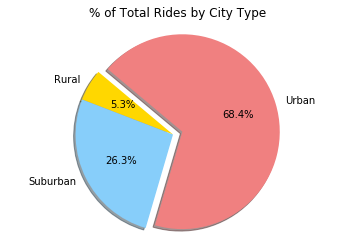

In [20]:
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)

ride_plot = plt.pie(ride_percents, explode=explode, labels=labels, colors=colors,
                       autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.savefig("Images/03_TotalRides_PieChart.png")
plt.show()

## Total Drivers by City Type

In [79]:
# Urban Driver Count
urban_drivers = urban_cities['driver_count'].first()
urban_drivers = urban_drivers.tolist()
urban_total_drivers = sum(urban_drivers)

# Suburban Driver Count
suburban_drivers = suburban_cities['driver_count'].first()
suburban_drivers = suburban_drivers.tolist()
suburban_total_drivers = sum(suburban_drivers)

# Rural Driver Count
rural_drivers = rural_cities['driver_count'].first()
rural_drivers = rural_drivers.tolist()
rural_total_drivers = sum(rural_drivers)

type_total_drivers = [rural_total_drivers, suburban_total_drivers, urban_total_drivers]
total_drivers = sum(type_total_drivers)


2973

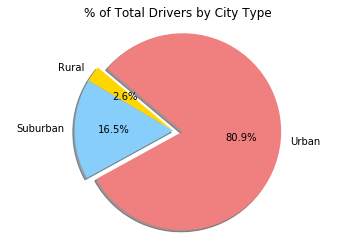

In [88]:
driver_percents = [(n / total_drivers * 100) for n in type_total_drivers]
driver_percents

# Plot
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .1)

ride_plot = plt.pie(driver_percents, explode=explode, labels=labels, colors=colors,
                       autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.savefig("Images/04_TotalDrivers_PieChart.png")
plt.show()